# MODIS Clouds?

In [22]:
# import
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import pandas

from ulmo import io as ulmo_io

# Load table

In [2]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [17]:
llc_tbl = ulmo_io.load_main_table('s3://llc/Tables/ulmo2_test.parquet')

Read main table: s3://llc/Tables/ulmo2_test.parquet


In [29]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


In [3]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,26.474998,25.814999,AQUA_MODIS.20030310T212506.L2.SST.nc,1047103981024267577,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,0
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,29.154999,28.695000,AQUA_MODIS.20031212T083006.L2.SST.nc,107110304377724818,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,1
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,25.750000,25.344999,AQUA_MODIS.20030924T223506.L2.SST.nc,106471913422084483,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,2
3,39.071575,18.569141,1028,2003-05-01 01:05:00,371.310120,898,0.049988,16.414951,15.160000,17.205000,16.725000,16.080000,AQUA_MODIS.20030501T010506.L2.SST.nc,1051129071619856914,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,3
4,17.901926,90.155480,997,2003-12-05 19:55:00,-214.759277,1520,0.035461,26.744499,24.975000,28.724998,27.824999,25.830000,AQUA_MODIS.20031205T195506.L2.SST.nc,1070107901927015548,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,4


# Cloud cutting

<AxesSubplot:>

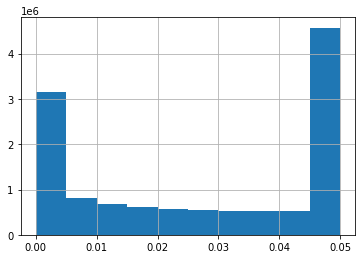

In [4]:
modis_tbl.clear_fraction.hist()

<AxesSubplot:>

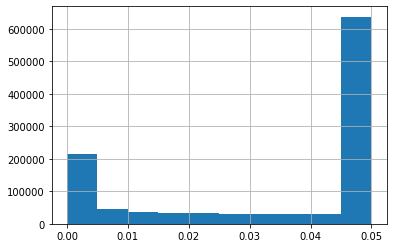

In [30]:
viirs_tbl.clear_fraction.hist()

## Cut

In [5]:
clear = modis_tbl.clear_fraction < 0.005
cloudy = modis_tbl.clear_fraction > 0.045

In [6]:
modis_tbl['Clouds'] = 'None'

In [7]:
modis_tbl.loc[clear, 'Clouds'] = 'clear'

In [8]:
modis_tbl.loc[cloudy, 'Clouds'] = 'cloudy'

In [9]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx,Clouds
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,26.474998,25.814999,AQUA_MODIS.20030310T212506.L2.SST.nc,1047103981024267577,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,0,clear
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,29.154999,28.695000,AQUA_MODIS.20031212T083006.L2.SST.nc,107110304377724818,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,1,cloudy
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,25.750000,25.344999,AQUA_MODIS.20030924T223506.L2.SST.nc,106471913422084483,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,2,None
3,39.071575,18.569141,1028,2003-05-01 01:05:00,371.310120,898,0.049988,16.414951,15.160000,17.205000,16.725000,16.080000,AQUA_MODIS.20030501T010506.L2.SST.nc,1051129071619856914,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,3,cloudy
4,17.901926,90.155480,997,2003-12-05 19:55:00,-214.759277,1520,0.035461,26.744499,24.975000,28.724998,27.824999,25.830000,AQUA_MODIS.20031205T195506.L2.SST.nc,1070107901927015548,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,4,None


## Histogram

(-2000.0, 1000.0)

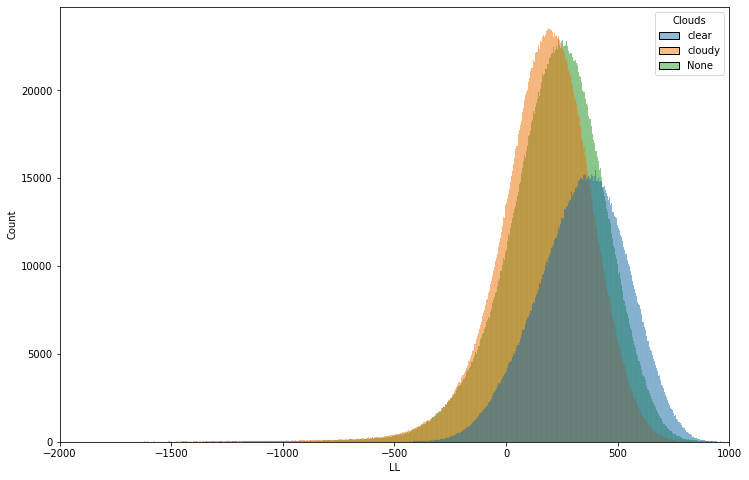

In [14]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.histplot(modis_tbl, x='LL', hue='Clouds', ax=ax)
ax.set_xlim(-2000., 1000.)

In [15]:
modis_tbl[clear].LL.mean()

339.2533568481721

In [18]:
llc_tbl.LL.mean()

328.9035949707031

In [19]:
modis_tbl[clear].LL.median(), llc_tbl.LL.median()

(350.11322021484375, 371.28863525390625)

## LLC vs. MODIS

In [21]:
df = pandas.DataFrame()

In [23]:
df['LL'] = np.concatenate([modis_tbl[clear].LL.values, llc_tbl.LL.values])

In [24]:
df['Sample'] = 'NONE'

In [26]:
df.loc[np.arange(np.sum(clear)), 'Sample'] = 'MODIS'

In [27]:
df.loc[np.sum(clear)+np.arange(len(llc_tbl)), 'Sample'] = 'LLC'

(-2000.0, 1000.0)

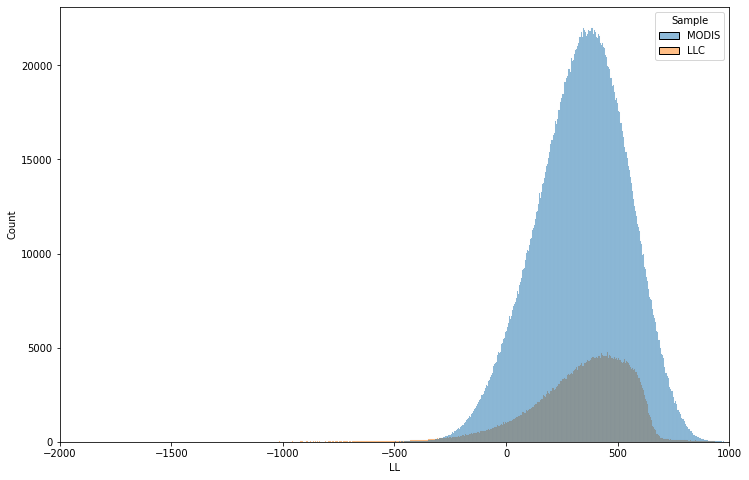

In [28]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
_ = sns.histplot(df, x='LL', hue='Sample', ax=ax)
ax.set_xlim(-2000., 1000.)